# Required Libraries

In [ ]:
pip install preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached preprocessor-1.1.3-py3-none-any.whl


In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached googletrans-3.1.0a0.tar.gz (19 kB)
  Using cached httpx-0.13.3-py3-none-any.whl (55 kB)
  Using cached sniffio-1.2.0-py3-none-any.whl (10 kB)
     |████████████████████████████████| 1.3 MB 4.5 MB/s 
  Using cached rfc3986-1.5.0-py2.py3-none-any.whl (31 kB)
  Using cached httpcore-0.9.1-py3-none-any.whl (42 kB)
     |████████████████████████████████| 65 kB 3.3 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=e170b0475797037c3a7f9cbbd3f6f364799d37e002a068f7707004bd39de42d4
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 


In [ ]:
pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Dataframe
import pandas as pd
import csv
from collections import Counter

# Crawling Data
import tweepy

# Text Preprocessing
import re
import preprocessor as p
import numpy as np
import nltk

nltk.download('stopwords')
nltk.download('punkt')

import string
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from googletrans import Translator
from nltk.tokenize import word_tokenize

# Split Data
from sklearn.model_selection import train_test_split

# Preprocessing, Layer, and Prediction
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop

# Plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
from palettable.colorbrewer.qualitative import Pastel1_7

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style = 'whitegrid')
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Crawling Twitter Dataset

In [ ]:
api_key = "rDaxsP3YqLQCjovabjW1sUw2X"
api_secret_key = "mrKlrDtyfK6shAxZA5SF1j0EKPJYFjlRkSIohKSoDDuog8FM2Z"
access_token = "1203295790162014208-4kODNCqXR7UiVNE8l8XpOKfABaQ3wl"
access_token_secret = "QtMUhiP9CDUJmRwtwfIvfzkBU6SD6gmAWLKPFFiUP6UGp"

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
search_key = "kuliah offline"

In [ ]:
csvFile = open('OfflineLectures.csv', 'a+', newline='', encoding='utf-8')

csvWriter = csv.writer(csvFile)
d = []
sn = []
n = []
t = []

for status in tweepy.Cursor(api.search_tweets, 
                            q=search_key, 
                            count=100, 
                            lang="id",
                            result_type="mixed",
                            until="2022-05-29").items():

                           d.append(status.created_at)
                           sn.append(status.user.screen_name)
                           n.append(status.user.name)
                           t.append(status.text)

                           print(status.created_at, 
                                 status.user.screen_name, 
                                 status.user.name, 
                                 status.text)
                                 
                           tweets = [status.created_at, 
                                     status.user.screen_name, 
                                     status.user.name, 
                                     status.text]
                                     
                           csvWriter.writerow(tweets)

2022-05-28 23:50:26+00:00 todaythewin 🍀rain freetag🍀🦀 kirain kuliah offline tugasnya bakal dikit ternyata sama aja, malah makin ribet😭💔
2022-05-28 23:43:50+00:00 sunflowerpuffs Hooniecomb🐧 jujur ini bener bgtt... kuliah udh full offline dan gue bingung dengan perbajuan karna baju gue ya itu2 aja ,apalag… https://t.co/r099ZRBdIM
2022-05-28 23:36:32+00:00 collegemenfess COLLE FORGER [cm] pengen bgt ngekost lagi rasanya tpi kuliah blm offline gara² smlm abis begadang ngerjain proposal udh hampir s… https://t.co/oXBhh1Z4Mv
2022-05-28 23:17:03+00:00 hahavirtual virtualmu Besok udah kuliah offline😭😭
2022-05-28 22:29:59+00:00 danskic dandi BESOK KULIAH OFFLINE 100% 🤗😇🤗😇🤗😇💀💀💀
2022-05-28 20:22:59+00:00 DCALC0MANIE 𝐙𝐄𝐄☠ Liat replyan tas atau totebagnya pada gede². Lah gue semenjak kuliah offline abis pandemi  berangkat bawa jiwa raga… https://t.co/HPScZz9xl5
2022-05-28 19:38:20+00:00 cemilih nanda kalo udah mulai normal lagi, udah pada sekolah kuliah offline, udah full wfo juga, gakebayang bakal

In [ ]:
with open('OfflineLectures.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('OfflineLectures.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(['Datetime','Screen Name', 'Name', 'Tweet'])
    w.writerows(data)

In [ ]:
df = pd.read_csv('OfflineLectures.csv')
df

,Datetime,Screen Name,Name,Tweet
0,2022-05-28 23:50:26+00:00,todaythewin,🍀rain freetag🍀🦀,kirain kuliah offline tugasnya bakal dikit ter...
1,2022-05-28 23:43:50+00:00,sunflowerpuffs,Hooniecomb🐧,jujur ini bener bgtt... kuliah udh full offlin...
2,2022-05-28 23:36:32+00:00,collegemenfess,COLLE FORGER,[cm] pengen bgt ngekost lagi rasanya tpi kulia...
3,2022-05-28 23:17:03+00:00,hahavirtual,virtualmu,Besok udah kuliah offline😭😭
4,2022-05-28 22:29:59+00:00,danskic,dandi,BESOK KULIAH OFFLINE 100% 🤗😇🤗😇🤗😇💀💀💀
...,...,...,...,...
1805,2022-05-21 11:42:00+00:00,rkhaadii,Rakha Adi,Ngeliat temen-temen pada wisuda offline seneng...
1806,2022-05-21 11:41:41+00:00,pieskwipie,liv ♡,@ansdrmy pengen sumpah bgt bgt tp lagi di band...
1807,2022-05-21 11:35:40+00:00,dndnjwa,najwa,untuk kepentingan kuliah mending beli motor at...
1808,2022-05-21 11:31:19+00:00,akuhanyaaku24,akuyo,Belom siap buat kuliah offline plis😭


# Text Preprocessing

In [ ]:
# Some functions for preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

def text_processing(text):
    text = text.apply(cleaningText)
    text = text.apply(casefoldingText)
    text = text.apply(tokenizingText)
    text = text.apply(filteringText)
    text = text.apply(stemmingText)
    return text

In [ ]:
# Preprocessing tweets data

df['text_clean'] = df['Tweet'].apply(cleaningText)
df['text_clean'] = df['text_clean'].apply(casefoldingText)
df.drop(['Tweet'], axis = 1, inplace = True)

df['text_preprocessed'] = df['text_clean'].apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(filteringText)
df['text_preprocessed'] = df['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
df.drop_duplicates(subset = 'text_clean', inplace = True)

In [ ]:
df

In [ ]:
# Export to csv file
df.to_csv(r'OfflineLectures-v2.csv', index = False, header = True,index_label=None)

# Twitter Sentiment Labelling Manually

Read the tweet dataset after the manual sentiment labeling process.

In [ ]:
tweets = pd.read_csv('OfflineLectures-v3.csv')

In [ ]:
tweets

,Datetime,Screen Name,Name,text_clean,text_preprocessed,sentiment
0,2022-05-28 23:50:26+00:00,todaythewin,ðŸ€rain freetagðŸ€ðŸ¦€,kirain kuliah offline tugasnya bakal dikit ter...,"['kirain', 'kuliah', 'offline', 'tugas', 'diki...",negative
1,2022-05-28 23:43:50+00:00,sunflowerpuffs,HooniecombðŸ§,jujur ini bener bgtt kuliah udh full offline d...,"['jujur', 'bener', 'bgtt', 'kuliah', 'udh', 'f...",negative
2,2022-05-28 23:36:32+00:00,collegemenfess,COLLE FORGER,cm pengen bgt ngekost lagi rasanya tpi kuliah ...,"['cm', 'ken', 'bgt', 'ngekost', 'tpi', 'kuliah...",positive
3,2022-05-28 23:17:03+00:00,hahavirtual,virtualmu,besok udah kuliah offlineðŸ˜­ðŸ˜­,"['besok', 'udah', 'kuliah', 'offline']",negative
4,2022-05-28 22:29:59+00:00,danskic,dandi,besok kuliah offline ðŸ¤—ðŸ˜‡ðŸ¤—ðŸ˜‡ðŸ¤—ðŸ˜‡...,"['besok', 'kuliah', 'offline', '']",negative
...,...,...,...,...,...,...
1660,2022-05-21 11:42:00+00:00,rkhaadii,Rakha Adi,ngeliat tementemen pada wisuda offline seneng ...,"['ngeliat', 'tementemen', 'wisuda', 'offline',...",positive
1661,2022-05-21 11:41:41+00:00,pieskwipie,liv â™¡,pengen sumpah bgt bgt tp lagi di bandung kalo ...,"['ken', 'sumpah', 'bgt', 'bgt', 'tp', 'bandung...",positive
1662,2022-05-21 11:35:40+00:00,dndnjwa,najwa,untuk kepentingan kuliah mending beli motor at...,"['penting', 'kuliah', 'mending', 'beli', 'moto...",positive
1663,2022-05-21 11:31:19+00:00,akuhanyaaku24,akuyo,belom siap buat kuliah offline plisðŸ˜­,"['bom', 'kuliah', 'offline', 'plis']",negative


In [ ]:
for i, text in enumerate(tweets['text_preprocessed']):
    tweets['text_preprocessed'][i] = tweets['text_preprocessed'][i].replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in tweets['text_preprocessed'][i].split():
        list_words.append(word)
        
    tweets['text_preprocessed'][i] = list_words   
    
tweets

,Datetime,Screen Name,Name,text_clean,text_preprocessed,sentiment
0,2022-05-28 23:50:26+00:00,todaythewin,ðŸ€rain freetagðŸ€ðŸ¦€,kirain kuliah offline tugasnya bakal dikit ter...,"[kirain, kuliah, offline, tugas, dikit, aja, r...",negative
1,2022-05-28 23:43:50+00:00,sunflowerpuffs,HooniecombðŸ§,jujur ini bener bgtt kuliah udh full offline d...,"[jujur, bener, bgtt, kuliah, udh, full, offlin...",negative
2,2022-05-28 23:36:32+00:00,collegemenfess,COLLE FORGER,cm pengen bgt ngekost lagi rasanya tpi kuliah ...,"[cm, ken, bgt, ngekost, tpi, kuliah, blm, offl...",positive
3,2022-05-28 23:17:03+00:00,hahavirtual,virtualmu,besok udah kuliah offlineðŸ˜­ðŸ˜­,"[besok, udah, kuliah, offline]",negative
4,2022-05-28 22:29:59+00:00,danskic,dandi,besok kuliah offline ðŸ¤—ðŸ˜‡ðŸ¤—ðŸ˜‡ðŸ¤—ðŸ˜‡...,"[besok, kuliah, offline]",negative
...,...,...,...,...,...,...
1660,2022-05-21 11:42:00+00:00,rkhaadii,Rakha Adi,ngeliat tementemen pada wisuda offline seneng ...,"[ngeliat, tementemen, wisuda, offline, neng, b...",positive
1661,2022-05-21 11:41:41+00:00,pieskwipie,liv â™¡,pengen sumpah bgt bgt tp lagi di bandung kalo ...,"[ken, sumpah, bgt, bgt, tp, bandung, kalo, min...",positive
1662,2022-05-21 11:35:40+00:00,dndnjwa,najwa,untuk kepentingan kuliah mending beli motor at...,"[penting, kuliah, mending, beli, motor, laptop...",positive
1663,2022-05-21 11:31:19+00:00,akuhanyaaku24,akuyo,belom siap buat kuliah offline plisðŸ˜­,"[bom, kuliah, offline, plis]",negative


In [ ]:
tweets.isna().sum()

Datetime              0
Screen Name           0
Name                  1
text_clean            0
text_preprocessed     0
sentiment            27
dtype: int64

In [ ]:
tweets = tweets.dropna()
tweets.isna().sum()

Datetime             0
Screen Name          0
Name                 0
text_clean           0
text_preprocessed    0
sentiment            0
dtype: int64

In [ ]:
tweets

,Datetime,Screen Name,Name,text_clean,text_preprocessed,sentiment
0,2022-05-28 23:50:26+00:00,todaythewin,ðŸ€rain freetagðŸ€ðŸ¦€,kirain kuliah offline tugasnya bakal dikit ter...,"[kirain, kuliah, offline, tugas, dikit, aja, r...",negative
1,2022-05-28 23:43:50+00:00,sunflowerpuffs,HooniecombðŸ§,jujur ini bener bgtt kuliah udh full offline d...,"[jujur, bener, bgtt, kuliah, udh, full, offlin...",negative
2,2022-05-28 23:36:32+00:00,collegemenfess,COLLE FORGER,cm pengen bgt ngekost lagi rasanya tpi kuliah ...,"[cm, ken, bgt, ngekost, tpi, kuliah, blm, offl...",positive
3,2022-05-28 23:17:03+00:00,hahavirtual,virtualmu,besok udah kuliah offlineðŸ˜­ðŸ˜­,"[besok, udah, kuliah, offline]",negative
4,2022-05-28 22:29:59+00:00,danskic,dandi,besok kuliah offline ðŸ¤—ðŸ˜‡ðŸ¤—ðŸ˜‡ðŸ¤—ðŸ˜‡...,"[besok, kuliah, offline]",negative
...,...,...,...,...,...,...
1660,2022-05-21 11:42:00+00:00,rkhaadii,Rakha Adi,ngeliat tementemen pada wisuda offline seneng ...,"[ngeliat, tementemen, wisuda, offline, neng, b...",positive
1661,2022-05-21 11:41:41+00:00,pieskwipie,liv â™¡,pengen sumpah bgt bgt tp lagi di bandung kalo ...,"[ken, sumpah, bgt, bgt, tp, bandung, kalo, min...",positive
1662,2022-05-21 11:35:40+00:00,dndnjwa,najwa,untuk kepentingan kuliah mending beli motor at...,"[penting, kuliah, mending, beli, motor, laptop...",positive
1663,2022-05-21 11:31:19+00:00,akuhanyaaku24,akuyo,belom siap buat kuliah offline plisðŸ˜­,"[bom, kuliah, offline, plis]",negative


### The Distribution of Tweets Dataset

In [ ]:
temp = tweets.groupby('sentiment').count()['text_preprocessed'].reset_index().sort_values(by='text_preprocessed',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text_preprocessed
0,negative,976
1,positive,661


In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text_preprocessed,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

# Visualize Word Cloud

Since data discrepancies are only found in sentiment columns, we use only A dataset for word cloud visualization.

### Visualize All Word Cloud

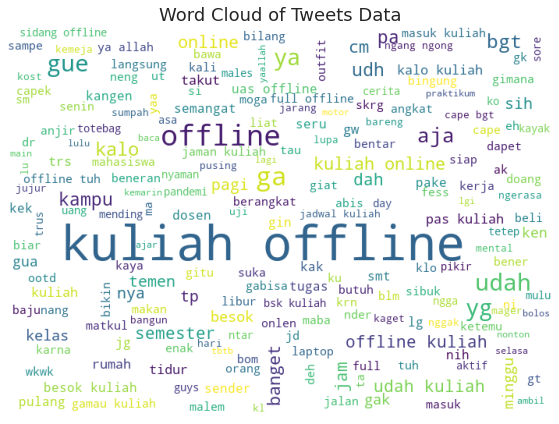

In [ ]:
list_words = ''

for tweet in tweets['text_preprocessed']:
  for word in tweet:
    list_words += ' ' + (word)

wordcloud = WordCloud(width=700, 
                      height=500, 
                      background_color='white',
                      min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

### Visualize Positive Word Cloud

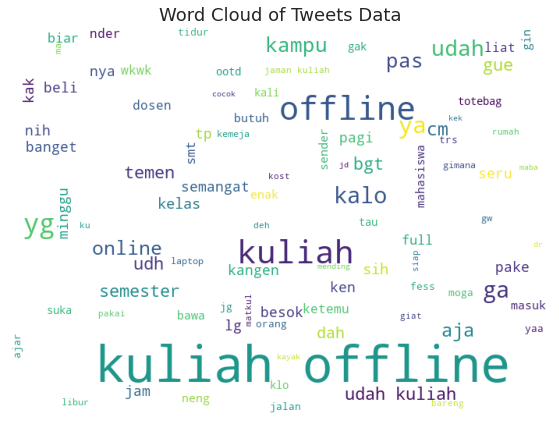

In [ ]:
tweets_positive = tweets[tweets['sentiment'] == 'positive' ]

list_words = ''

for tweet in tweets_positive['text_preprocessed']:
  for word in tweet:
    list_words += ' ' + (word)

wordcloud = WordCloud(width=700, 
                      height=500, 
                      background_color='white',
                      min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

### Visualize Negative Word Cloud

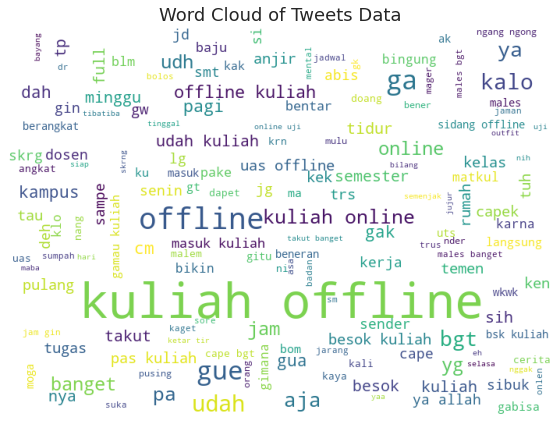

In [ ]:
tweets_negative = tweets[tweets['sentiment'] == 'negative' ]

list_words = ''

for tweet in tweets_negative['text_preprocessed']:
  for word in tweet:
    list_words += ' ' + (word)

wordcloud = WordCloud(width=700, 
                      height=500, 
                      background_color='white',
                      min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

# Most Common Words in Our Tweet Text After Preprocessed. 

Since data discrepancies are only found in sentiment columns, we use only A dataset for most common words visualization.

In [ ]:
top = Counter([item for sublist in tweets['text_preprocessed'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
0,kuliah,1632
1,offline,1535
2,udah,226
3,ga,189
4,online,187
5,ya,169
6,gue,157
7,kalo,152
8,yg,147
9,pas,144


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count', title='Tree of Most Common Words')
fig.show()

# Most Common Words for Every Sentiment Label.

In [ ]:
positiveSentiment = tweets[tweets['sentiment']=='positive']
negativeSentiment = tweets[tweets['sentiment']=='negative']

### Most Common Positive Words.

In [ ]:
top = Counter([item for sublist in positiveSentiment['text_preprocessed'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,kuliah,651
1,offline,608
2,udah,96
3,yg,87
4,ya,73
5,kalo,64
6,ga,62
7,pas,51
8,kampus,51
9,online,49


In [ ]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
fig = px.treemap(temp_positive, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

### Most Common Negative Words

In [ ]:
top = Counter([item for sublist in negativeSentiment['text_preprocessed'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,kuliah,981
1,offline,927
2,online,138
3,udah,130
4,ga,127
5,gue,118
6,bgt,104
7,ya,96
8,pas,93
9,banget,89


In [ ]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

# Natural Language Processing

In [ ]:
# Make text preprocessed (tokenized) to untokenized with toSentence Function
X = tweets['text_preprocessed'].apply(toSentence)
max_features = 5000

In [ ]:
# Tokenize text with specific maximum number of words to keep, based on word frequency
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)

In [ ]:
X = pad_sequences(X)
X.shape

(1637, 24)

In [ ]:
polarity_encode = {'positive' : 0, 'negative' : 1}
label = tweets['sentiment'].map(polarity_encode).values

In [ ]:
label.shape

(1637,)

In [ ]:
tweetText_train, tweetText_test, label_train, label_test = train_test_split(X, label, test_size=0.2, random_state=0)

In [ ]:
print(tweetText_train.shape, label_train.shape)
print(tweetText_test.shape, label_test.shape)

(1309, 24) (1309,)
(328, 24) (328,)


In [ ]:
tweetText_train.shape[1]

24

In [ ]:
def create_model(embed_dim=16, hidden_unit=16, dropout_rate=0.2, optimizers='Adam', learning_rate=0.01):
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=embed_dim, input_length=tweetText_train.shape[1]))
    model.add(LSTM(units=hidden_unit, activation = 'tanh'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers(learning_rate=learning_rate), metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
model = KerasClassifier(model=create_model,
                        # Model Parameters
                        dropout_rate=0.2,
                        embed_dim=32,
                        hidden_unit=16,
                        optimizers=Adam,
                        learning_rate=0.01,
                   
                        # Fit Parameters
                        epochs=10, 
                        batch_size=128,
                        # Initiate validation data, which is 10% data from data train. It's used for evaluation model
                        validation_split=0.1)
                         

model_prediction = model.fit(tweetText_train, label_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 32)            160000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 163,187
Trainable params: 163,187
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
10/10 [==============================] - 4s 83ms/step - loss: 0.8743 - accuracy: 0.4839 - val_loss: 0.7131 - val_accuracy: 0.5649
Epoch 2/10
10/10 [==================

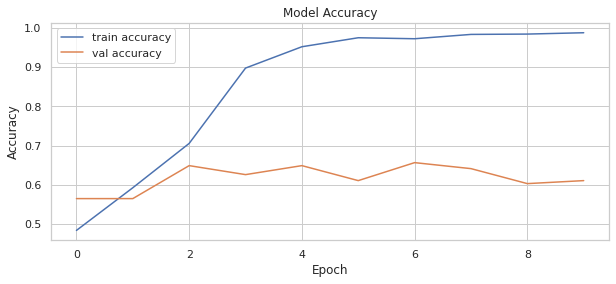

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model_prediction.history_['accuracy'], label = 'train accuracy')
ax.plot(model_prediction.history_['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

3/3 [==============================] - 1s 8ms/step
Model Accuracy on Test Data: 0.725609756097561


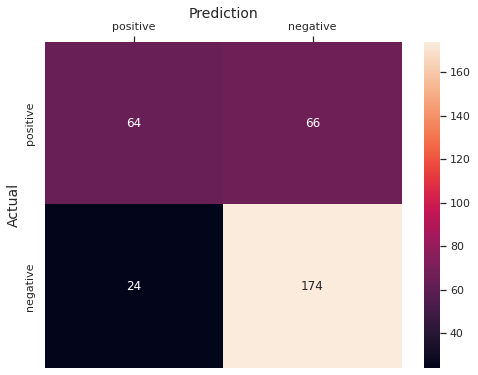

In [ ]:
y_pred = model.predict(tweetText_test)
accuracy = accuracy_score(label_test, y_pred)
print('Model Accuracy on Test Data:', accuracy)
confusion_matrix(label_test, y_pred)

fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = label_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['positive', 'negative'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['positive', 'negative'])
plt.show()

In [ ]:
# Initializing and preprocessing new text data
otherData = pd.DataFrame()
otherData['text'] = ["kuliah offline seru banget", "tapi serius deh semakin kesini makin takut kuliah offline"]

otherData['text_clean'] = otherData['text'].apply(cleaningText)
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['text'], axis = 1, inplace = True)

otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
otherData

,text_clean,text_preprocessed
0,kuliah offline seru banget,"[kuliah, offline, seru, banget]"
1,tapi serius deh semakin kesini makin takut kul...,"[serius, deh, kesini, takut, kuliah, offline]"


In [ ]:
# Preprocessing text data

# Make text preprocessed (tokenized) to untokenized with toSentence Function
X_otherData = otherData['text_preprocessed'].apply(toSentence)
X_otherData = tokenizer.texts_to_sequences(X_otherData.values)
X_otherData = pad_sequences(X_otherData, maxlen = X.shape[1])
X_otherData

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   2,  58,  13],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 453,  62, 435,  32,   1,   2]],
      dtype=int32)

In [ ]:
# Results from prediction sentiment on text data

y_pred_otherData = model.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'positive', 1 : 'negative'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

1/1 [==============================] - 0s 19ms/step


,text_clean,text_preprocessed,Result Prediction
0,kuliah offline seru banget,"[kuliah, offline, seru, banget]",positive
1,tapi serius deh semakin kesini makin takut kul...,"[serius, deh, kesini, takut, kuliah, offline]",negative
